In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
from src.utils import tqdm
from src.plots import *
from src.data_loading import iter_reviews, load_beers_breweries_users, data_load
from src.data_processing import add_review_columns, review_counts_by, isEnglish
from src.plot_wordcloud import plot_wordcloud, tf_idf
from src.models import emotion_sentiment, polarity_sentiment
from src.text_processing import top_negative_words, get_complaints_by_topic, get_complaints_by_beer_name, split_review

In [2]:
# use this link to download graphs and all the needed dataframes and graphs: 
# https://drive.google.com/drive/folders/1wggLpvzeNB2IIY3vebOUGbSt7SwRFiQY?usp=drive_link

nb_reviews = 58824 # about 1M lines 
path_to_rating = "data/RateBeer/ratings.txt"
# raw_data = data_load(path_to_rating, "all")
raw_data = data_load(path_to_rating, nb_reviews)

In [3]:
non_english_lines = [ind for ind, rev in enumerate(raw_data["review"]) if isEnglish(rev)]
enlgish_data = raw_data.loc[non_english_lines]

### DATA EXPLORATION 

### Diving into the reviews to gain a better understanding of our beers

##### Experts

##### Beer feature extraction with TF-IDF

##### Beer topics extraction using LDA

In [ ]:
# data = pd.read_pickle("review_with_emotions.pkl")
# lda_by_beers(data, 7)
data = pd.read_pickle("lda_by_beer/results_lda.pkl")

In [4]:
from gensim import models
model_lda = models.LdaModel.load("lda_by_beer/LDA_model.pkl")
for x in model_lda.print_topics(num_topics=7, num_words=5):
    print("Topic", x[0], ":", x[1])

Topic 0 : 0.036*"hazy" + 0.022*"orange" + 0.021*"golden" + 0.019*"yellow" + 0.019*"yeast"
Topic 1 : 0.048*"sour" + 0.032*"tart" + 0.020*"bottle" + 0.018*"red" + 0.015*"fruit"
Topic 2 : 0.026*"citrus" + 0.025*"hop" + 0.024*"orange" + 0.022*"hops" + 0.021*"hoppy"
Topic 3 : 0.047*"roasted" + 0.043*"black" + 0.042*"chocolate" + 0.039*"brown" + 0.029*"coffee"
Topic 4 : 0.032*"golden" + 0.022*"bottle" + 0.021*"pale" + 0.020*"malty" + 0.016*"yellow"
Topic 5 : 0.043*"brown" + 0.033*"caramel" + 0.028*"amber" + 0.023*"malty" + 0.022*"bottle"
Topic 6 : 0.019*"like" + 0.013*"one" + 0.012*"little" + 0.010*"much" + 0.009*"color"


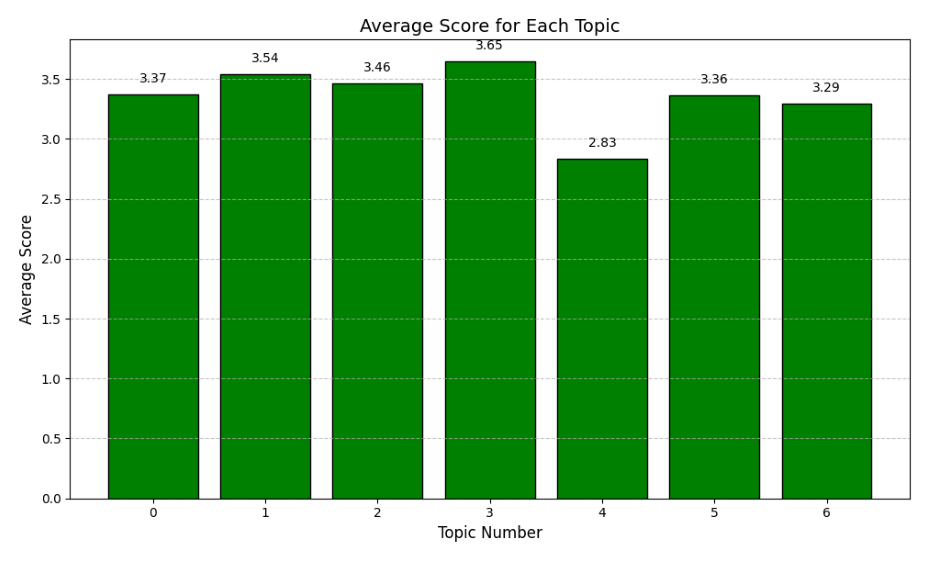

In [5]:
# data = pd.read_pickle("lda_by_beer/results_lda.pkl")
# plot_avg_score_by_topic(data)

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
fig, ax = plt.subplots(figsize=(10, 6))
img = mpimg.imread('graphs/average_score_by_topic.png')
ax.imshow(img)
plt.tight_layout()
plt.axis('off')
plt.show()

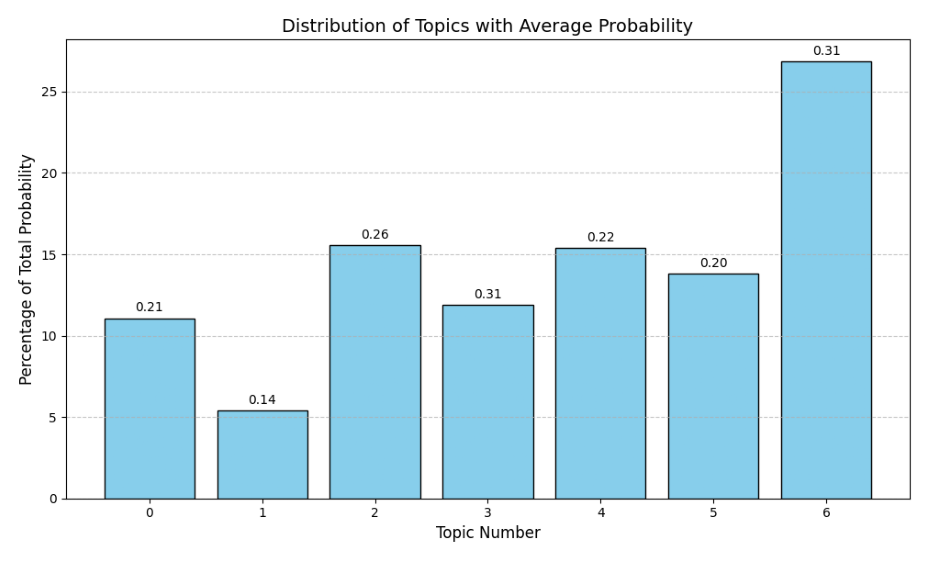

In [6]:
# data = pd.read_pickle("lda_by_beer/results_lda.pkl")
# plot_topic_distrib(data)

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
fig, ax = plt.subplots(figsize=(10, 6))
img = mpimg.imread('graphs/distribution_topics.png')
ax.imshow(img)
plt.tight_layout()
plt.axis('off')
plt.show()

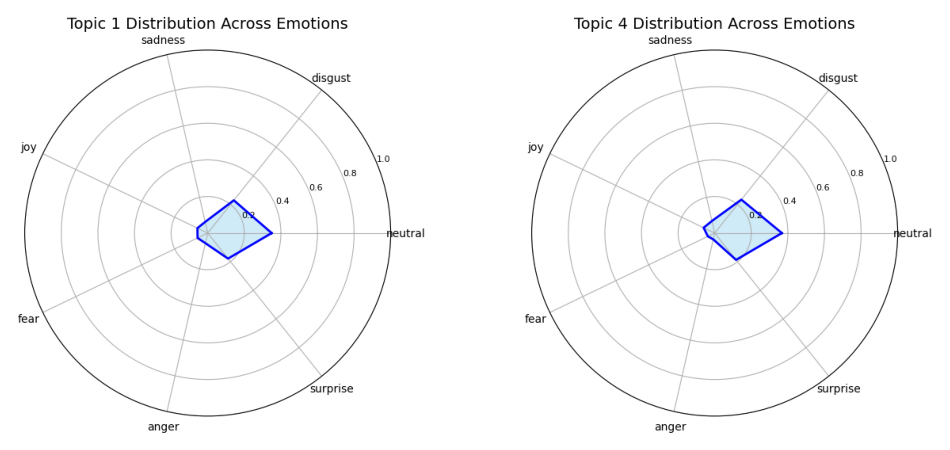

In [7]:
# data = pd.read_pickle("lda_by_beer/results_lda.pkl")
# plot_topic_emotions_distrib(data)

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
imgs = [mpimg.imread('graphs/radar_graph_emotions_by_topic_1.png'), mpimg.imread('graphs/radar_graph_emotions_by_topic_4.png')]
_, axs = plt.subplots(1, 2, figsize=(12, 12))
axs = axs.flatten()
for img, ax in zip(imgs, axs):
    ax.axis('off') 
    ax.imshow(img)
plt.show()

### Decoding complaints : the language of discontent

##### Extracting negative aspects/comments using TF-IDF 

##### Extracting negative aspects/comments using emotion analysis

In [ ]:
# data = emotion_sentiment(enlgish_data, cuda=True)
# user = pd.read_csv("data/RateBeer/users.csv") # We merge on users.csv to get the location of the users
# data = data.merge(user, on="user_id") 
data = pd.read_pickle("review_with_emotions.pkl")

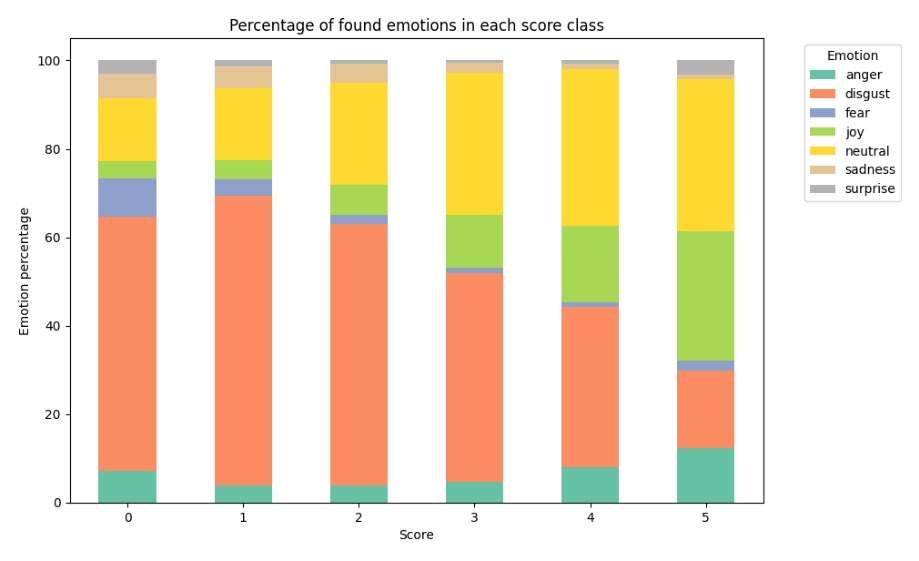

Spearman correlation for emotions by score: 
(if p value < 0.05 we can say that a change in score, introducted a predictable increase or decrease in the percentage for that emotion) 
          Spearman correlation   p-value
anger                 0.600000  0.208000
disgust              -0.828571  0.041563
fear                 -0.657143  0.156175
joy                   1.000000  0.000000
neutral               0.942857  0.004805
sadness              -1.000000  0.000000
surprise              0.028571  0.957155



In [8]:
# plot_emotion_by_score_spearman(data)

fig, ax = plt.subplots(figsize=(10, 6))
img = mpimg.imread('graphs/emotions_by_class.png')
ax.imshow(img)
plt.tight_layout()
plt.axis('off')
plt.show()

with open("graphs/spearman_output.out", "r") as f:
    print(f.read())

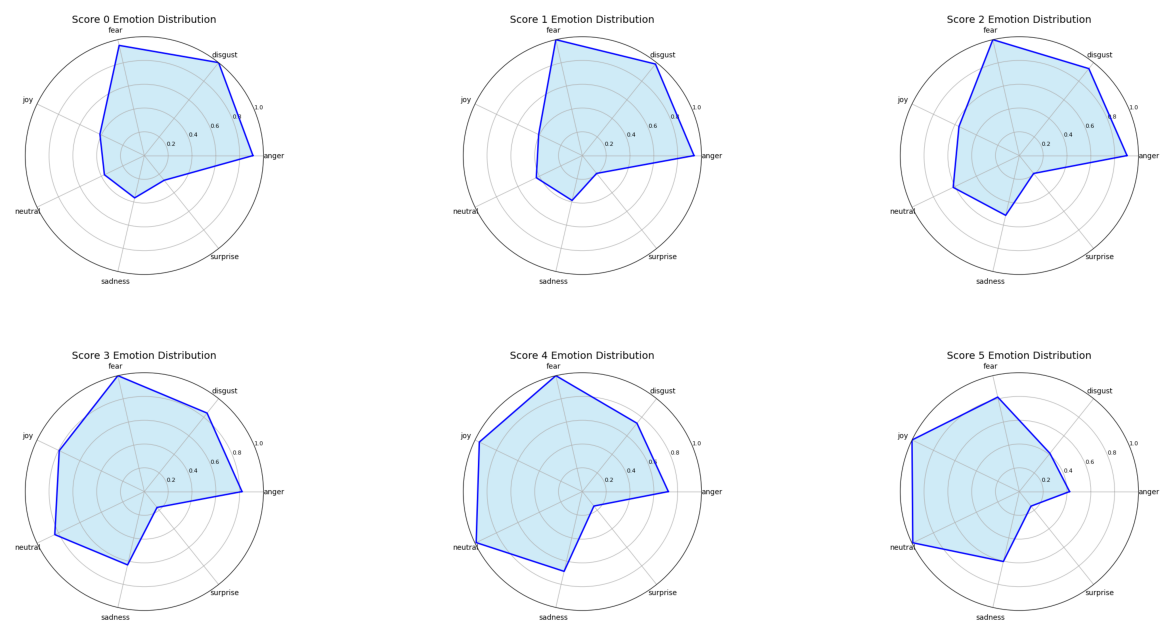

In [9]:
# data = pd.read_pickle("lda_by_beer/results_lda.pkl")
# plot_score_emotions_distrib(data)

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
imgs = [mpimg.imread('graphs/radar_graph_emotions_by_score_0.png'),
        mpimg.imread('graphs/radar_graph_emotions_by_score_1.png'), 
        mpimg.imread('graphs/radar_graph_emotions_by_score_2.png'),
        mpimg.imread('graphs/radar_graph_emotions_by_score_3.png'),
        mpimg.imread('graphs/radar_graph_emotions_by_score_4.png'),
        mpimg.imread('graphs/radar_graph_emotions_by_score_5.png'),]
_, axs = plt.subplots(2, 3, figsize=(16, 8))
axs = axs.flatten()
for img, ax in zip(imgs, axs):
    ax.axis('off') 
    ax.imshow(img)
plt.show()

##### Using emotion anaylsis and NLP summarize to extract complaints from high score reviews

In [ ]:
split_data = []
for idx, row in data[((data["score"] == 5) | (data["score"] == 4))].iterrows():
    review_chunks = split_review(row['review']) 
    for chunk in review_chunks:
        split_data.append({'beer_name': row['beer_name'], 'review': chunk})

split_df = pd.DataFrame(split_data)

In [10]:
# tokens_feeling = pd.read_pickle("review_with_tokens_emotions.pkl")
# topic_by_beer = pd.read_pickle("lda_by_beer/results_lda.pkl")
# topic_index = 2
# get_complaints_by_topic(topic_by_beer, tokens_feeling, topic_index)
with open("graphs/complaints_topic2.out", "r") as f:
    print(f.read())

Final Summary of All Complaints:
The Only Peachy color and half cloudy look lingering and piney quite a hoppy nose . Pours a hazy amber color with a dense off white head but not great stuff! The cask version is more dry hopped and the mouthfeel is much more oily . The taste is very pungently bitter but this was hugely unbalanced Amber beer .




In [11]:
# df = pd.read_pickle("review_with_tokens_emotions.pkl")
# beer_name = "Rochefort Trappistes 10"
# get_complaints_by_beer_name(df, beer_name)
with open("graphs/complaints_beer.out", "r") as f:
    print(f.read())

Final Summary of All Complaints:
The Rochefort Trappistes 10 pours a very dark brown to nearly black with a bubbly light tan head that lasts forever and leaves thick lacing full of dark fruits . Pours a dark prune colour with an endless beige head of champagne like bubbles . Tastes quite Christmassy with a thick treacle like taste .


### Following the clues : what drives negativity

##### Negativity by location, beer style, beer topic or abv

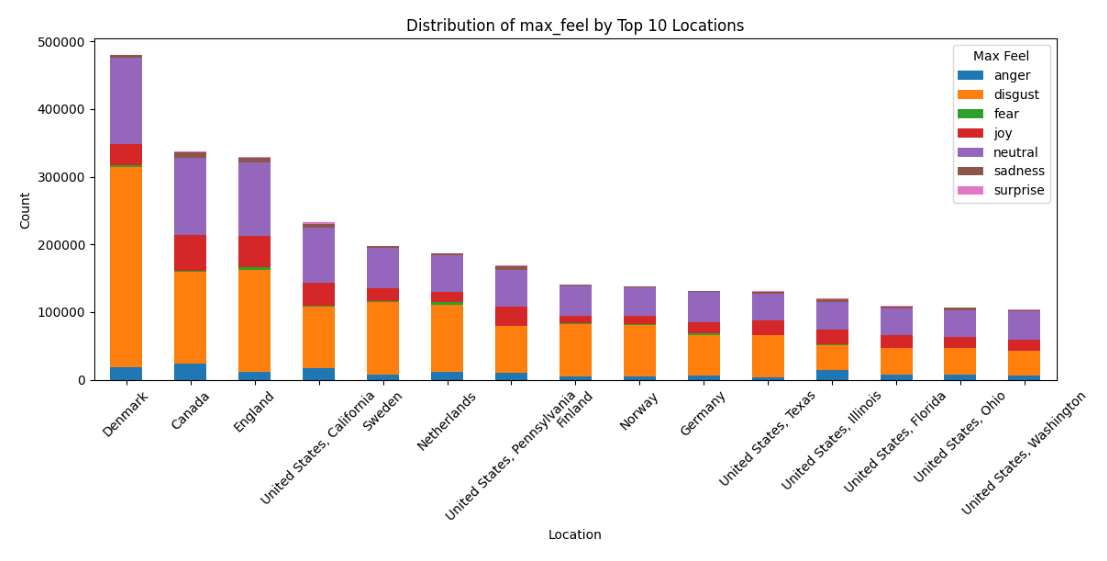

In [12]:
# data = pd.read_pickle("review_with_emotions.pkl")
# plot_emotion_loc_distrib(data)

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
fig, ax = plt.subplots(figsize=(12, 6))
img = mpimg.imread('graphs/max_feel_by_loc.png')
ax.imshow(img)
plt.tight_layout()
plt.axis('off')
plt.show()

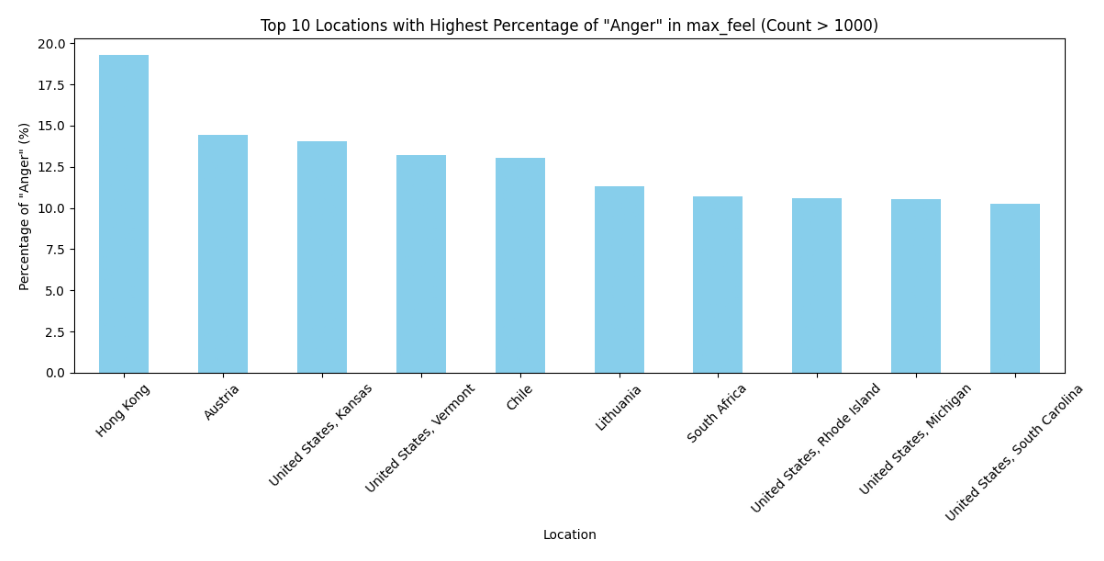

In [13]:
# data = pd.read_pickle("review_with_emotions.pkl")
# threshold = 1000
# emotion_name = "anger"
# top_n = 10
# plot_top_loc_emotion(data, threshold, emotion_name, top_n)


import matplotlib.pyplot as plt
import matplotlib.image as mpimg
fig, ax = plt.subplots(figsize=(12, 6))
img = mpimg.imread('graphs/max_anger_by_loc.png')
ax.imshow(img)
plt.tight_layout()
plt.axis('off')
plt.show()

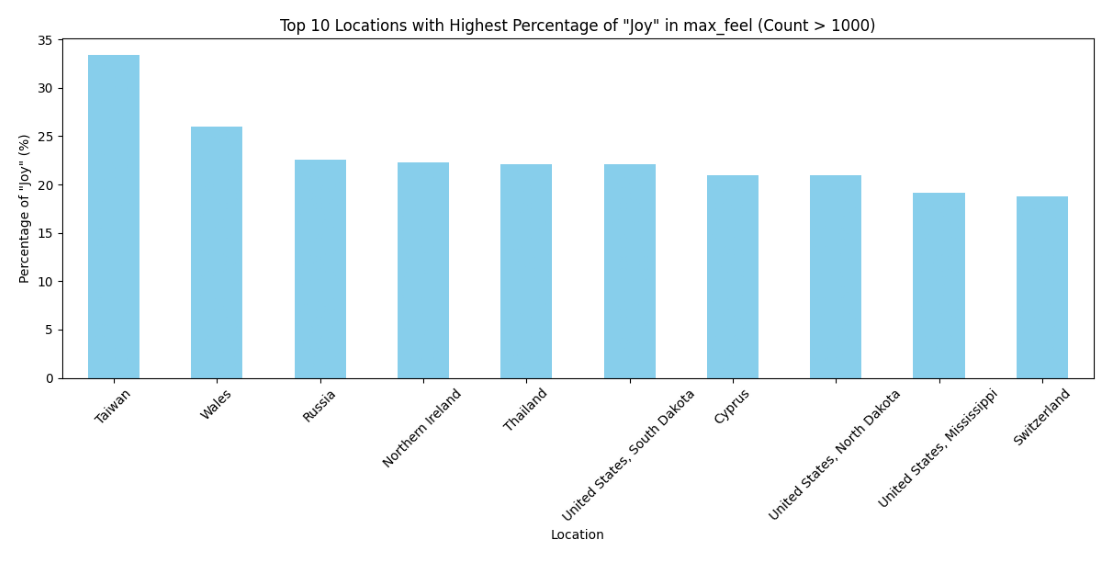

In [14]:
# data = pd.read_pickle("review_with_emotions.pkl")
# threshold = 1000
# emotion_name = "joy"
# top_n = 10
# plot_top_loc_emotion(data, threshold, emotion_name, top_n)

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
fig, ax = plt.subplots(figsize=(12, 6))
img = mpimg.imread('graphs/max_joy_by_loc.png')
ax.imshow(img)
plt.tight_layout()
plt.axis('off')
plt.show()

### Conclusion : avoiding the pitfalls